In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def epidemic_model(t, x, y, z, H, beta, gamma):
    dxdt = -(beta / H) * x * y
    dydt = (beta / H) * x * y  - (1 / gamma) * y
    dzdt = (1 / gamma) * y
    return dxdt, dydt, dzdt

def runge_kutta_4th_order(H, beta, gamma, x0, y0, z0, t0, h, T):
    n = int(T / h) + 1
    t_values = np.linspace(t0, T, n)
    x_values = np.zeros(n)
    y_values = np.zeros(n)
    z_values = np.zeros(n)
    
    x_values[0], y_values[0], z_values[0] = x0, y0, z0
    
    for i in range(1, n):
        t = t_values[i - 1]
        x, y, z = x_values[i - 1], y_values[i - 1], z_values[i - 1]
        
        k1x, k1y, k1z = epidemic_model(t, x, y, z, H, beta, gamma)
        k2x, k2y, k2z = epidemic_model(t + h / 2, x + h * k1x / 2, y + h * k1y / 2, z + h * k1z / 2, H, beta, gamma)
        k3x, k3y, k3z = epidemic_model(t + h / 2, x + h * k2x / 2, y + h * k2y / 2, z + h * k2z / 2, H, beta, gamma)
        k4x, k4y, k4z = epidemic_model(t + h, x + h * k3x, y + h * k3y, z + h * k3z, H, beta, gamma)
        
        x_values[i] = x + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y_values[i] = y + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        z_values[i] = z + (h / 6) * (k1z + 2 * k2z + 2 * k3z + k4z)
    
    return t_values, x_values, y_values, z_values

In [75]:
# Вхідні дані
H = 985
beta = 10
gamma = 15
x0 = 885
y0 = 75
z0 = 25
t0 = 0
h = 0.1
T = 40

# Розв’язок системи рівнянь
t_values, x_values, y_values, z_values = runge_kutta_4th_order(H, beta, gamma, x0, y0, z0, t0, h, T)

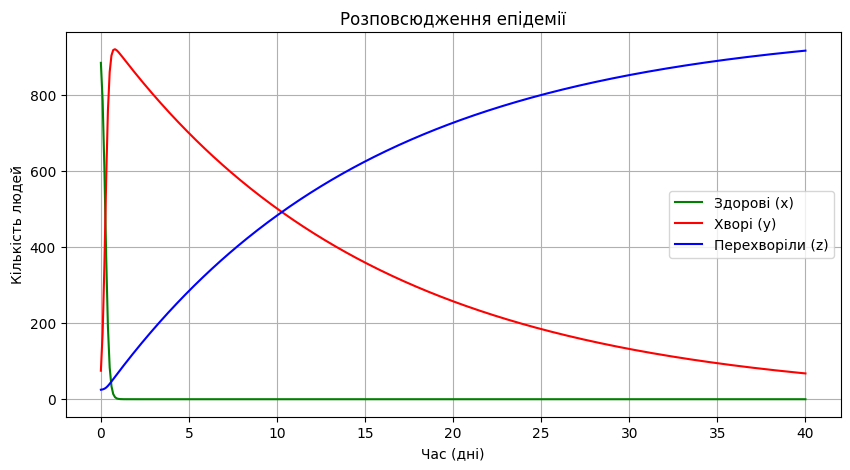

In [76]:
# Побудова графіків
plt.figure(figsize=(10, 5))
plt.plot(t_values, x_values, label='Здорові (x)', color='green')
plt.plot(t_values, y_values, label='Хворі (y)', color='red')
plt.plot(t_values, z_values, label='Перехворіли (z)', color='blue')
plt.xlabel('Час (дні)')
plt.ylabel('Кількість людей')
plt.title('Розповсюдження епідемії')
plt.legend()
plt.grid()
plt.show()